In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, h5py

sys.path.append('C:/Users/richy/OneDrive/Bureau/prog/jupyternb/')

import fidle.pwk as pwk


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28 ,1)
x_test = x_test.reshape(-1, 28, 28 , 1)

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)


x_train (60000, 28, 28, 1)
x_test (10000, 28, 28, 1)
y_train (60000,)
y_test (10000,)


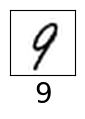

In [3]:
pwk.plot_images(x_train, y_train, [22])

In [4]:
print('before normalization : min={}, max={}'.format(x_train.min(), x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test = x_test / xmax

print('after normalization : min={}, max={}'.format(x_train.min(), x_train.max()))

before normalization : min=0, max=255
after normalization : min=0.0, max=1.0


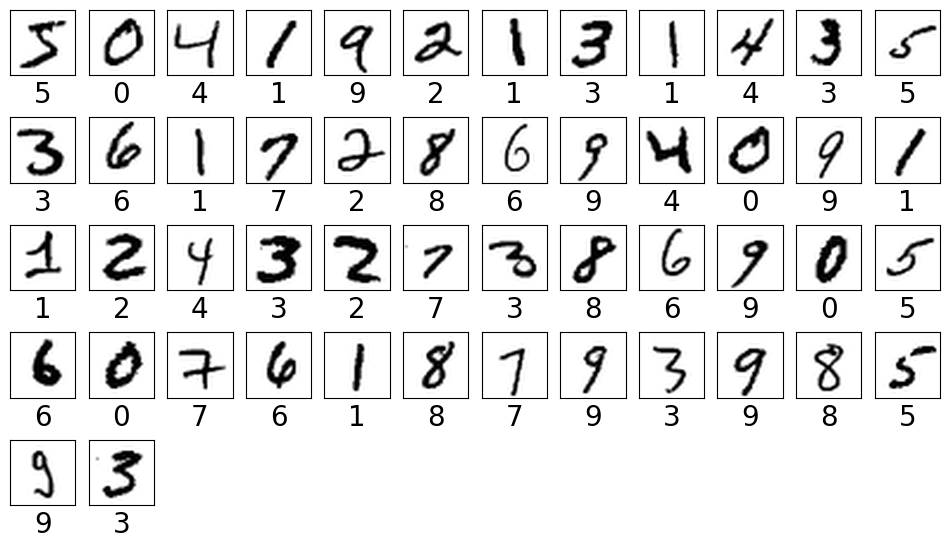

In [5]:
pwk.plot_images(x_train, y_train, range(0, 50))

In [6]:
def get_model_v1():
    model = keras.models.Sequential()
    model.add( keras.layers.Input((28,28,1)))
    
    model.add( keras.layers.Conv2D(32, (3,3), activation='relu') )
    model.add( keras.layers.MaxPooling2D((2,2)))
    
    model.add( keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add( keras.layers.MaxPooling2D((2,2)))
    
    model.add( keras.layers.Flatten())
    model.add( keras.layers.Dense(128, activation='relu'))
              
    model.add( keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
model = get_model_v1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [8]:
x_train[11].shape

(28, 28, 1)

In [9]:
 history = model.fit(x_train , y_train, batch_size = 256, epochs = 16, verbose= 1, validation_data = (x_test, y_test))

Epoch 1/16
235/235 [==============================] - 16s 65ms/step - loss: 0.2911 - accuracy: 0.9173 - val_loss: 0.0724 - val_accuracy: 0.9767
Epoch 2/16
235/235 [==============================] - 14s 61ms/step - loss: 0.0708 - accuracy: 0.9785 - val_loss: 0.0543 - val_accuracy: 0.9837
Epoch 3/16
235/235 [==============================] - 14s 58ms/step - loss: 0.0519 - accuracy: 0.9839 - val_loss: 0.0440 - val_accuracy: 0.9861
Epoch 4/16
235/235 [==============================] - 14s 58ms/step - loss: 0.0395 - accuracy: 0.9882 - val_loss: 0.0359 - val_accuracy: 0.9885
Epoch 5/16
235/235 [==============================] - 15s 65ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0310 - val_accuracy: 0.9896
Epoch 6/16
235/235 [==============================] - 14s 60ms/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0412 - val_accuracy: 0.9874
Epoch 7/16
235/235 [==============================] - 15s 62ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0342 - val_accuracy:

In [31]:
model.save("C:/Users/richy/OneDrive/Bureau/prog/jupyternb/model.h5")

In [18]:
score = model.evaluate(x_test, y_test, verbose = 0)

print('test loss', score[0])
print('test accuracy', score[1])

test loss 0.03538054972887039
test accuracy 0.9904999732971191


313/313 [==============================] - 1s 3ms/step


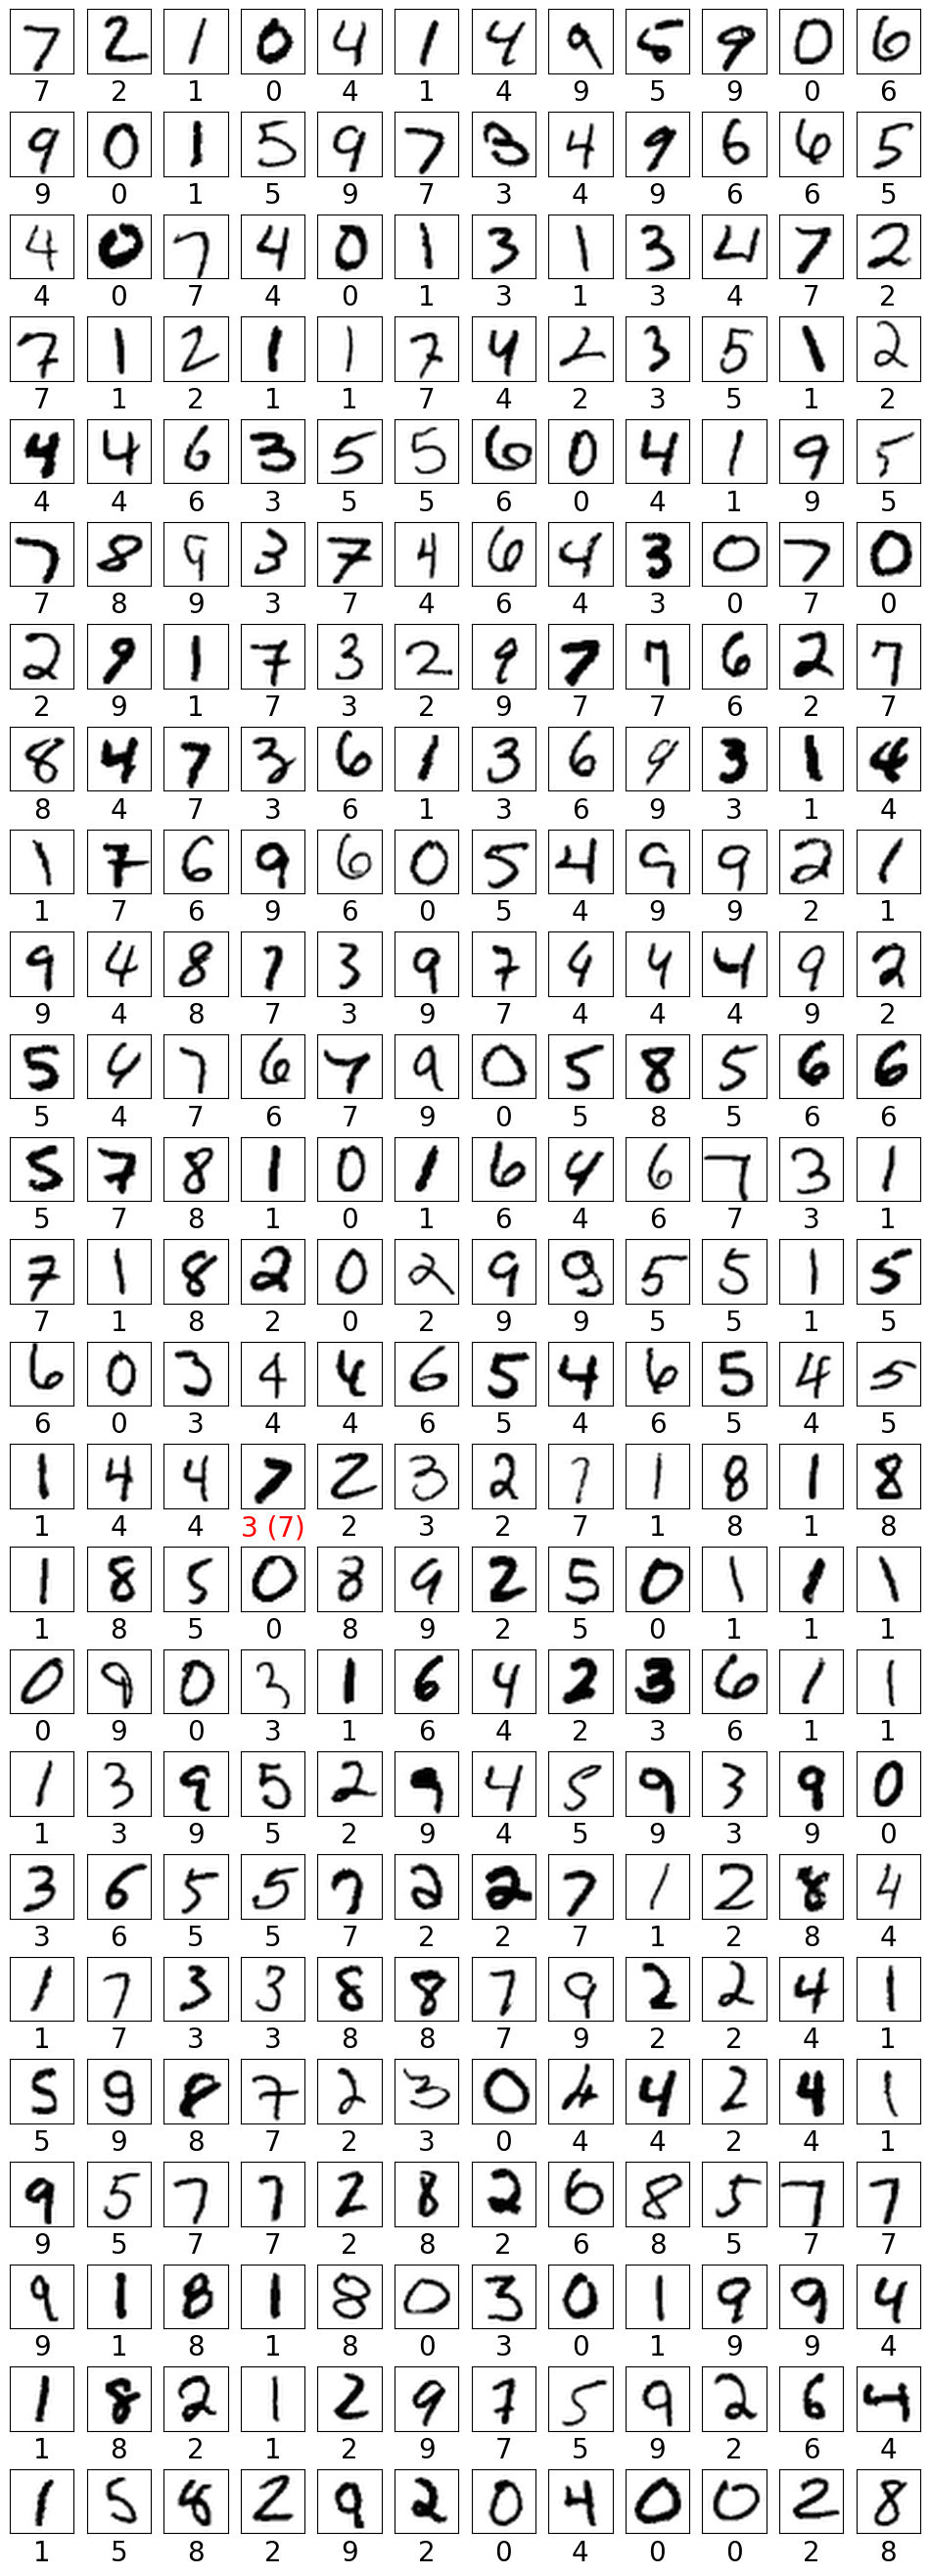

In [19]:
y_sigmoid = model.predict(x_test)
y_pred = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0, 300), y_pred=y_pred)

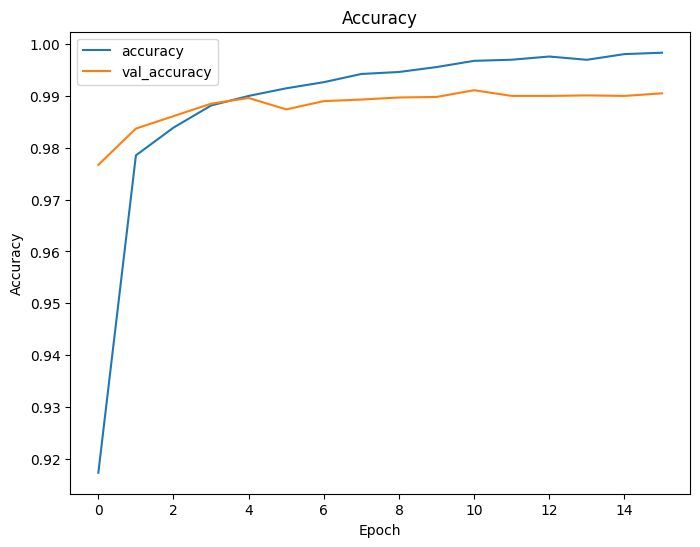

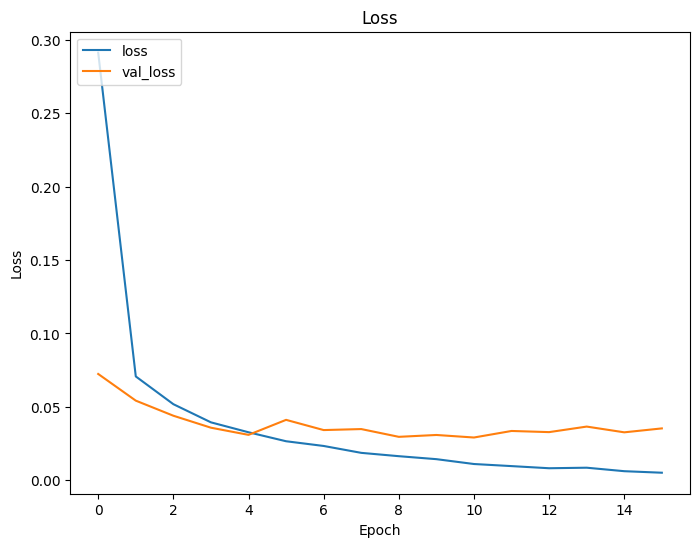

In [20]:
pwk.plot_history(history)

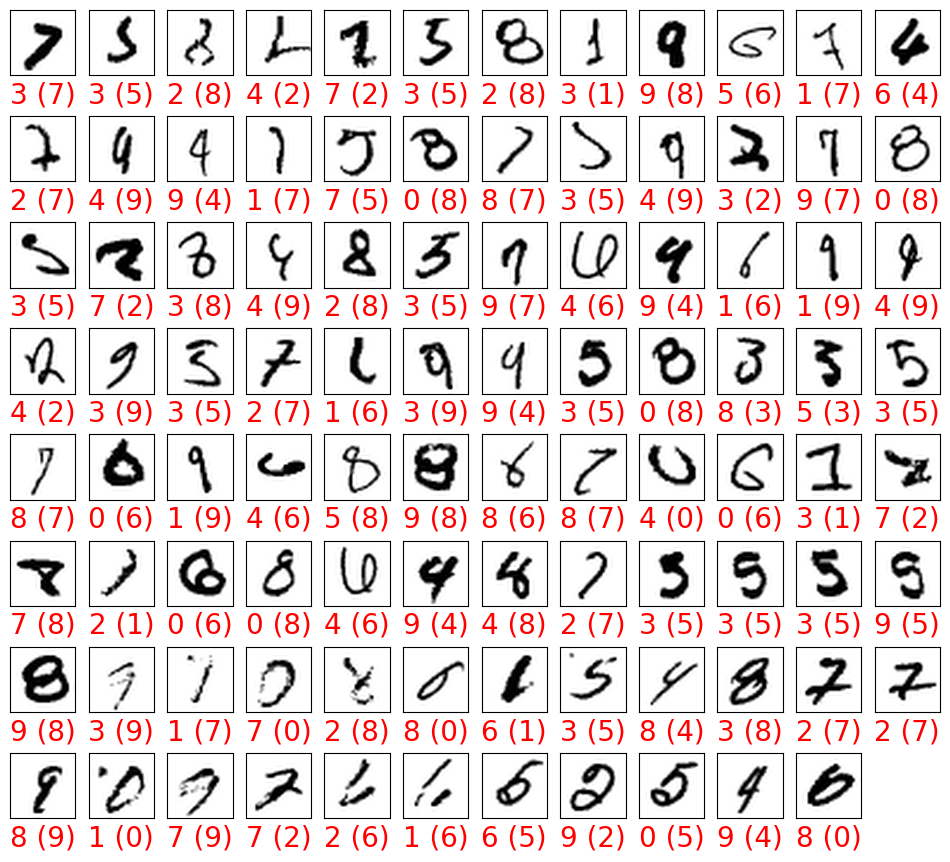

In [21]:
errors = [i for i in range(len(x_test)) if y_pred[i] != y_test[i]]

pwk.plot_images(x_test, y_test, errors, y_pred=y_pred)

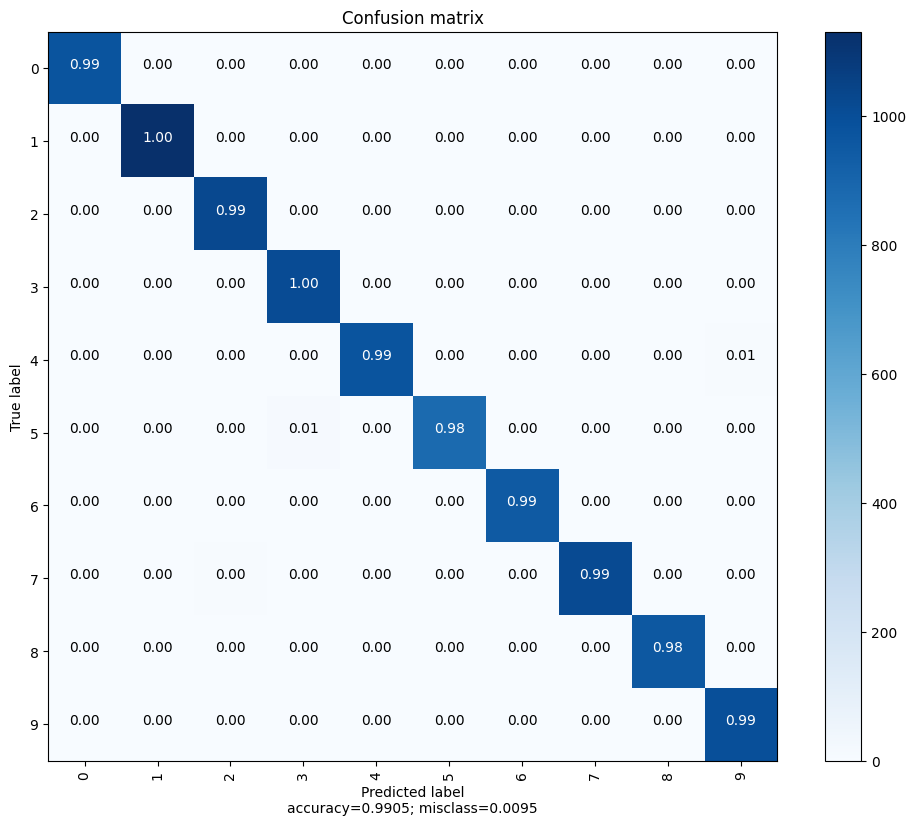

In [22]:
 pwk.plot_confusion_matrix(y_test, y_pred, range(0, 10), normalize=True)